In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score,classification_report

In [289]:
df=pd.read_csv("C:/Users/ADMIN/Downloads/kideny disease dataset.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [290]:
df.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [292]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [293]:
df.shape

(400, 26)

In [294]:
df.corr()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775
bgr,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183


<AxesSubplot:>

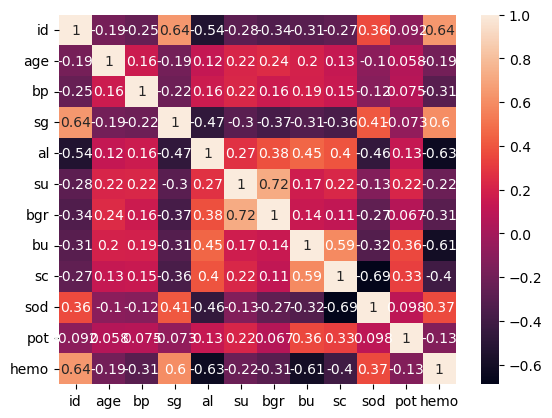

In [295]:
sns.heatmap(df.corr(),annot=True)

In [296]:
#FINDING NULL VALUES

In [297]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [298]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bp'}>,
        <AxesSubplot:title={'center':'sg'}>],
       [<AxesSubplot:title={'center':'al'}>,
        <AxesSubplot:title={'center':'su'}>,
        <AxesSubplot:title={'center':'bgr'}>],
       [<AxesSubplot:title={'center':'bu'}>,
        <AxesSubplot:title={'center':'sc'}>,
        <AxesSubplot:title={'center':'sod'}>],
       [<AxesSubplot:title={'center':'pot'}>,
        <AxesSubplot:title={'center':'hemo'}>, <AxesSubplot:>]],
      dtype=object)

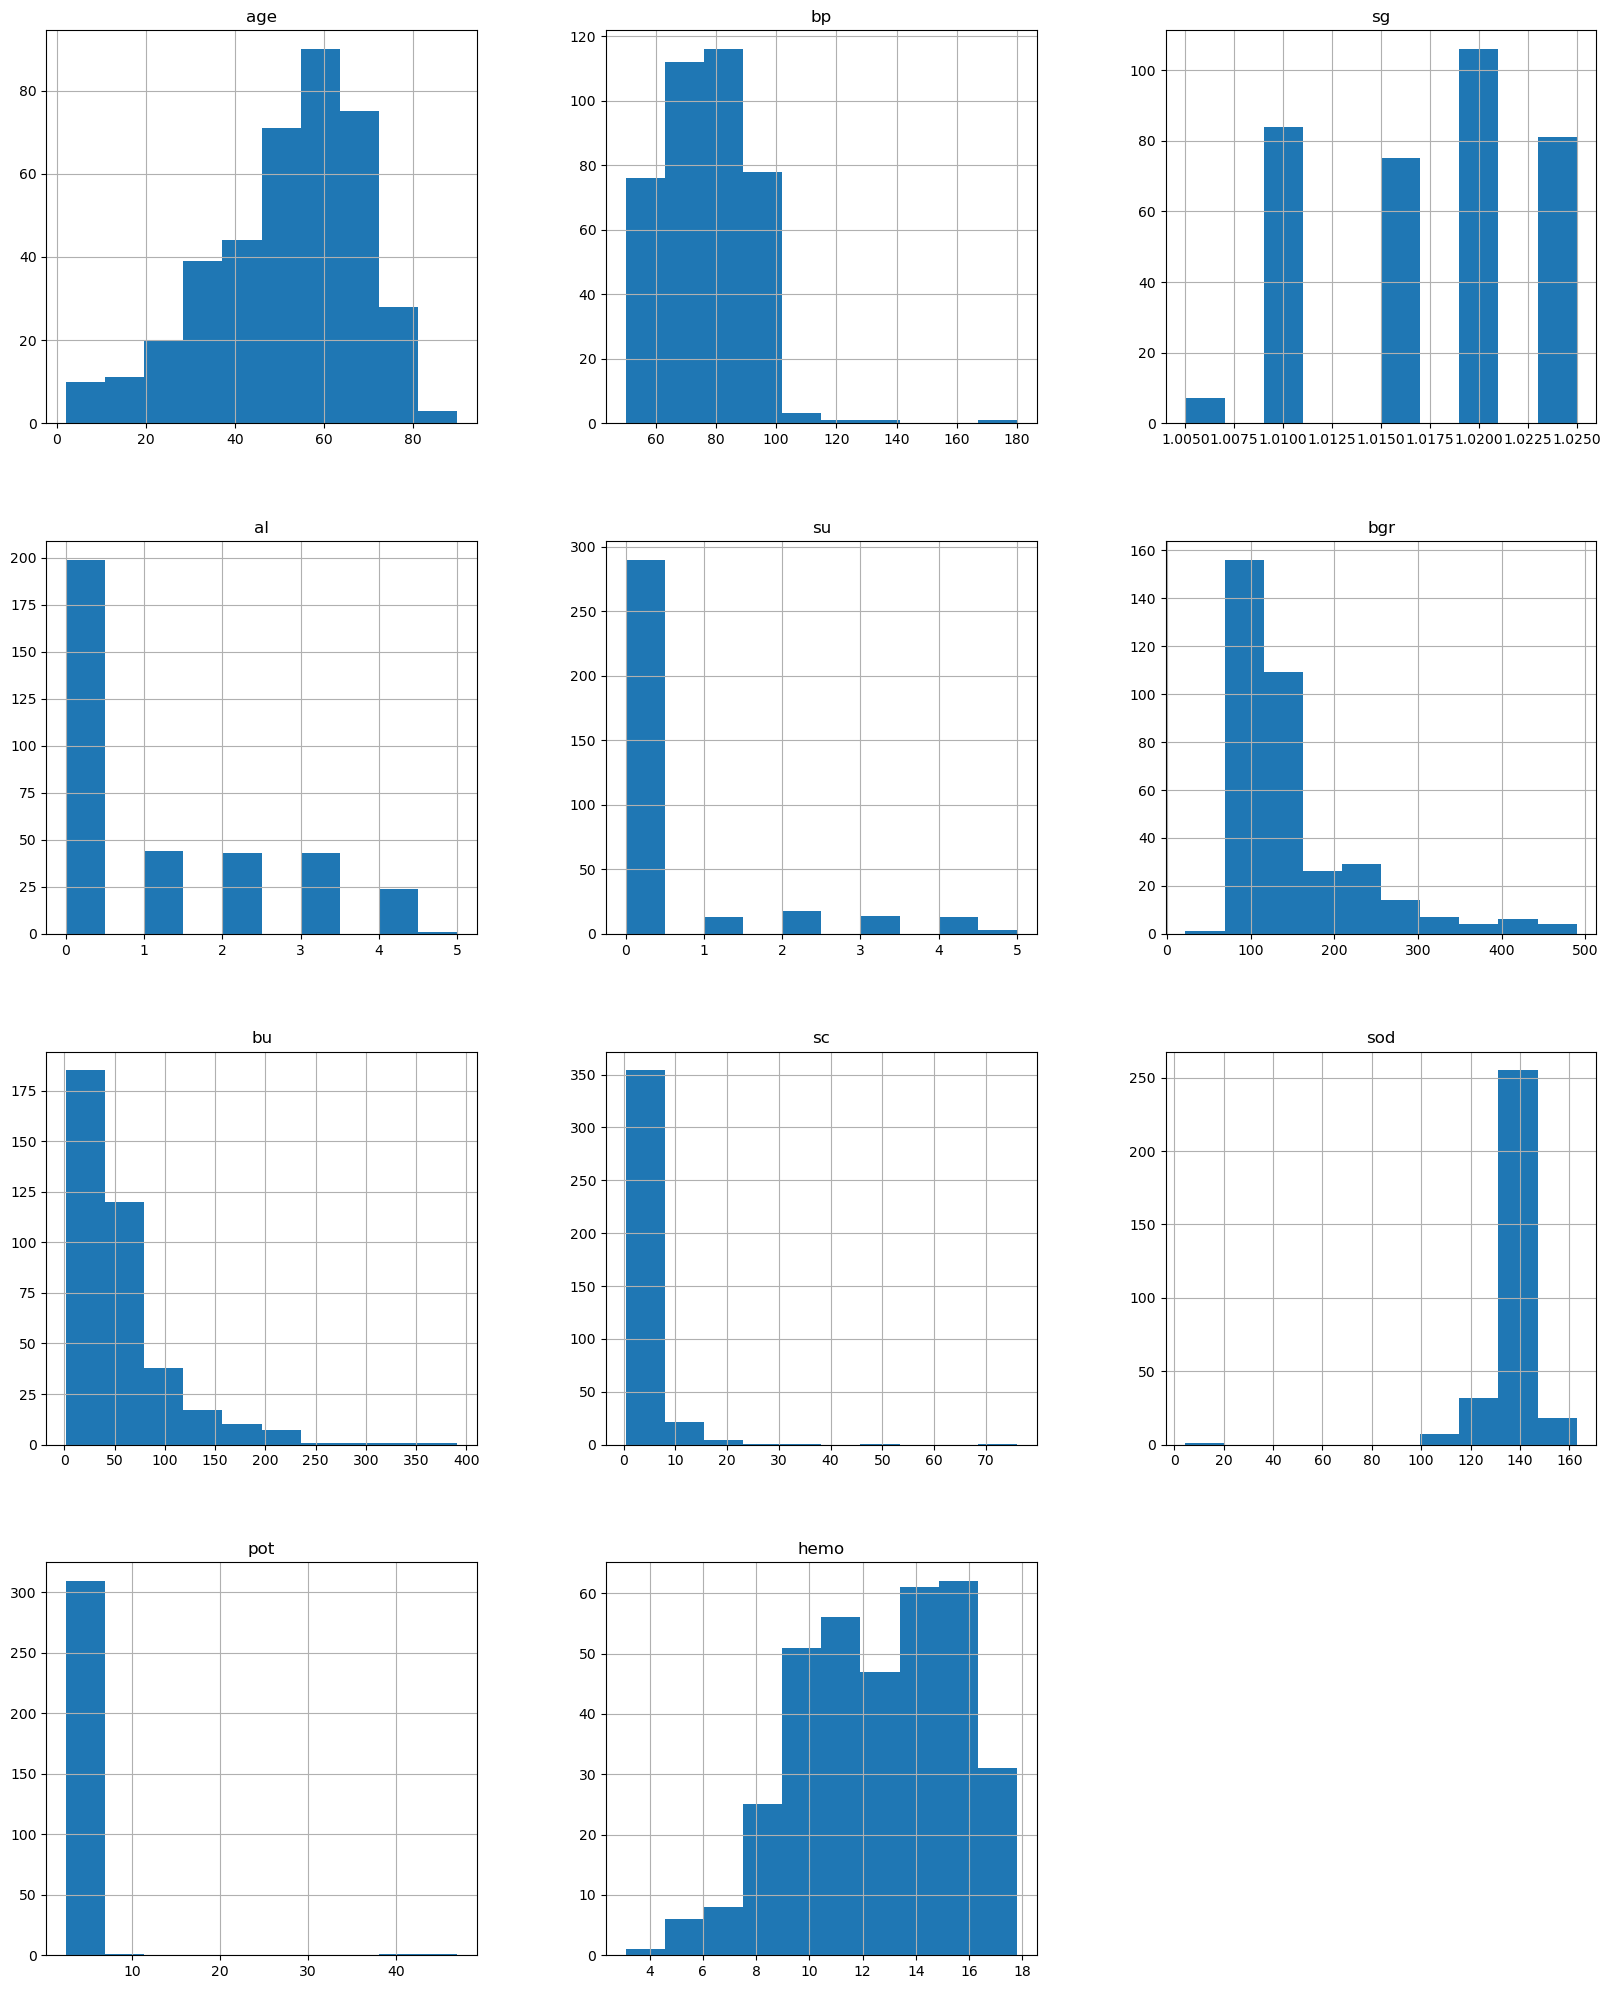

In [299]:
graph=df.select_dtypes(['float'])
graph.hist(figsize=(20,25))

In [300]:
df['bp']=df['bp'].fillna(df['bp'].mean())

In [301]:
for i in['age','sg','al','su','bgr','bu','sc','sod','pot','hemo']:
    df[i]=df[i].fillna(df[i].median())

In [302]:
for j in[ 'rbc', 'pc', 'pcc', 'ba','pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']:
    df[j]=df[j].fillna(df[j].mode()[0])

In [303]:
df.isnull().mean()*100

id                0.0
age               0.0
bp                0.0
sg                0.0
al                0.0
su                0.0
rbc               0.0
pc                0.0
pcc               0.0
ba                0.0
bgr               0.0
bu                0.0
sc                0.0
sod               0.0
pot               0.0
hemo              0.0
pcv               0.0
wc                0.0
rc                0.0
htn               0.0
dm                0.0
cad               0.0
appet             0.0
pe                0.0
ane               0.0
classification    0.0
dtype: float64

In [304]:
#ENCODING

In [305]:
df.nunique()

id                400
age                76
bp                 11
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               146
bu                118
sc                 84
sod                34
pot                40
hemo              116
pcv                44
wc                 92
rc                 46
htn                 2
dm                  5
cad                 3
appet               2
pe                  2
ane                 2
classification      3
dtype: int64

In [306]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [307]:
from sklearn.preprocessing import LabelEncoder

In [308]:
m=['rbc', 'pc', 'pcc', 'ba','pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane','classification']
lab=LabelEncoder()
for i in m:
    df[i]=lab.fit_transform(df[i])
    

In [309]:
df.drop(['id'],axis=1,inplace=True)
df.sample(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,37,61,33,0,3,1,0,0,0,2
30,55.0,70.0,1.020,0.0,0.0,1,1,0,0,93.0,...,29,90,31,1,2,1,0,0,0,0
221,66.0,70.0,1.020,1.0,0.0,1,1,0,0,248.0,...,29,90,31,1,4,1,0,0,0,0
285,66.0,70.0,1.020,0.0,0.0,1,1,0,0,94.0,...,29,49,38,0,3,1,0,0,0,2
202,78.0,60.0,1.020,0.0,0.0,1,1,0,0,114.0,...,12,90,31,0,4,1,0,0,1,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,26,56,31,0,3,1,0,0,0,0
386,46.0,70.0,1.025,0.0,0.0,1,1,0,0,100.0,...,31,53,44,0,3,1,0,0,0,2
64,55.0,80.0,1.010,0.0,0.0,1,1,0,0,146.0,...,29,90,31,0,3,0,0,0,0,0
171,83.0,70.0,1.020,3.0,0.0,1,1,0,0,102.0,...,14,24,10,1,3,1,1,0,1,0
302,29.0,70.0,1.020,0.0,0.0,1,1,0,0,127.0,...,36,90,31,0,3,1,0,0,0,2


In [310]:
y=df['classification']
x=df.drop(['classification'],axis=1)
print(y)
print(x)

0      0
1      0
2      0
3      0
4      0
      ..
395    2
396    2
397    2
398    2
399    2
Name: classification, Length: 400, dtype: int32
      age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  hemo  pcv  wc  \
0    48.0  80.0  1.020  1.0  0.0    1   1    0   0  121.0  ...  15.4   32  72   
1     7.0  50.0  1.020  4.0  0.0    1   1    0   0  121.0  ...  11.3   26  56   
2    62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.0  ...   9.6   19  70   
3    48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...  11.2   20  62   
4    51.0  80.0  1.010  2.0  0.0    1   1    0   0  106.0  ...  11.6   23  68   
..    ...   ...    ...  ...  ...  ...  ..  ...  ..    ...  ...   ...  ...  ..   
395  55.0  80.0  1.020  0.0  0.0    1   1    0   0  140.0  ...  15.7   35  62   
396  42.0  70.0  1.025  0.0  0.0    1   1    0   0   75.0  ...  16.5   42  72   
397  12.0  80.0  1.020  0.0  0.0    1   1    0   0  100.0  ...  15.8   37  61   
398  17.0  60.0  1.025  0.0  0.0    1   1  

# train and test

In [311]:
from sklearn.model_selection import train_test_split

In [312]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)

# logistic regression

In [313]:
from sklearn.linear_model import LogisticRegression

In [314]:
lr=LogisticRegression()
model_lr=lr.fit(xtrain,ytrain)
lr_pred=model_lr.predict(xtest)
lr_pred

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2])

In [315]:
logistic_accuracy=print(accuracy_score(lr_pred,ytest))
print(classification_report(lr_pred,ytest))    

0.975
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           2       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



# KNN

In [316]:
from sklearn.neighbors import KNeighborsClassifier

In [317]:
metric_k=[]
neighbors=np.arange(3,17)

In [318]:
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    model_knn=knn.fit(xtrain,ytrain)
    knn_pred=model_knn.predict(xtest)
    acc=accuracy_score(knn_pred,ytest)
    metric_k.append(acc)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [319]:
metric_k

[0.85,
 0.875,
 0.8625,
 0.85,
 0.85,
 0.85,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.8,
 0.825,
 0.8125,
 0.825]

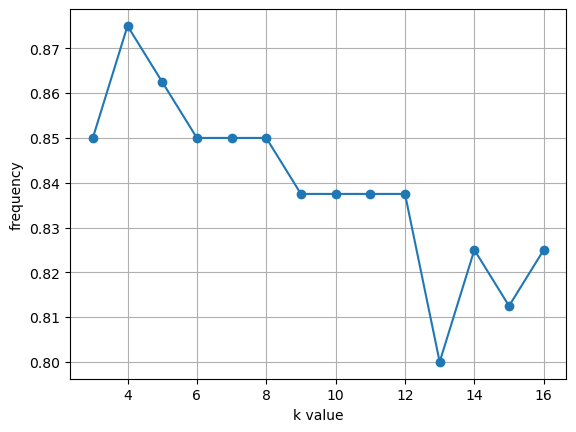

In [320]:
plt.plot(neighbors,metric_k,'-o')
plt.xlabel('k value')
plt.ylabel('frequency')
plt.grid()

In [321]:
knn=KNeighborsClassifier(n_neighbors=13)
model_knn=knn.fit(xtrain,ytrain)
knn_pred=model_knn.predict(xtest)
knn_pred

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2])

In [322]:
knn_accuracy=print(accuracy_score(knn_pred,ytest))
print(classification_report(knn_pred,ytest))

0.8
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        42
           2       0.89      0.66      0.76        38

    accuracy                           0.80        80
   macro avg       0.82      0.79      0.79        80
weighted avg       0.82      0.80      0.80        80



# svm

In [323]:
from sklearn.svm import SVC

In [324]:
svm=SVC()
model_svm=svm.fit(xtrain,ytrain)
svm_pred=model_svm.predict(xtest)
svm_pred

array([2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2])

In [325]:
svm_accuracy=print(accuracy_score(svm_pred,ytest))
print(classification_report(svm_pred,ytest))

0.8875
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        45
           2       0.96      0.77      0.86        35

    accuracy                           0.89        80
   macro avg       0.91      0.87      0.88        80
weighted avg       0.90      0.89      0.89        80



# decision tree

In [326]:
from sklearn.tree import DecisionTreeClassifier

In [327]:
dt=DecisionTreeClassifier(random_state=42)
model_dt=dt.fit(xtrain,ytrain)
dt_pred=model_dt.predict(xtest)
dt_pred

array([0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2])

In [328]:
decision_accuracy=print(accuracy_score(dt_pred,ytest))
print(classification_report(dt_pred,ytest))

0.9875
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00        28

    accuracy                           0.99        80
   macro avg       0.66      0.67      0.66        80
weighted avg       0.98      0.99      0.98        80



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# random forest

In [329]:
from sklearn.ensemble import RandomForestClassifier

In [330]:
rf=RandomForestClassifier(random_state=42)
model_rf=rf.fit(xtrain,ytrain)
rf_pred=model_rf.predict(xtest)
rf_pred

array([0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2])

In [331]:
random_accuracy=print(accuracy_score(rf_pred,ytest))
print(classification_report(rf_pred,ytest))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# boosting

# 1.ada boosting

In [332]:
from sklearn.ensemble import AdaBoostClassifier

In [333]:
ada=AdaBoostClassifier()
model_ada=ada.fit(xtrain,ytrain)
ada_pred=model_ada.predict(xtest)
ada_pred

array([0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2])

In [334]:
ada_accuracy=print(accuracy_score(ada_pred,ytest))
print(classification_report(ada_pred,ytest))

0.8875
              precision    recall  f1-score   support

           0       0.98      0.86      0.92        59
           2       0.71      0.95      0.82        21

    accuracy                           0.89        80
   macro avg       0.85      0.91      0.87        80
weighted avg       0.91      0.89      0.89        80



# 2.xg boosting

In [335]:
from xgboost import XGBClassifier

In [336]:
xg=XGBClassifier()
model_xg=xg.fit(xtrain,ytrain)
xg_pred=model_xg.predict(xtest)
xg_pred

array([0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2], dtype=int64)

In [337]:
xgb_accuracy=print(accuracy_score(xg_pred,ytest))
print(classification_report(xg_pred,ytest))

0.9875
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           2       1.00      0.97      0.98        29

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



# 3.gradient boosting

In [338]:
from sklearn.ensemble import GradientBoostingClassifier

In [339]:
gb=GradientBoostingClassifier()
model_gb=gb.fit(xtrain,ytrain)
gb_pred=model_gb.predict(xtest)
gb_pred

array([0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2])

In [352]:
gb_accuracy=print(accuracy_score(gb_pred,ytest))
print(classification_report(gb_pred,ytest))

0.975
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       0.00      0.00      0.00         1
           2       1.00      0.97      0.98        29

    accuracy                           0.97        80
   macro avg       0.65      0.66      0.65        80
weighted avg       0.96      0.97      0.97        80



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes

# 1.Gaussian NB

In [341]:
from sklearn.naive_bayes import GaussianNB

In [342]:
gnb=GaussianNB()
model_gnb=gnb.fit(xtrain,ytrain)
gnb_pred=model_gnb.predict(xtest)
gnb_pred

array([2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2])

In [354]:
gnb_accuracy=print(accuracy_score(ytest,gnb_pred))
print(classification_report(ytest,gnb_pred))

0.9875
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           2       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



# 2.multinomiel

In [344]:
from sklearn.naive_bayes import MultinomialNB

In [345]:
nm=MultinomialNB()
model_nm=nm.fit(xtrain,ytrain)
nm_pred=model_nm.predict(xtest)
nm_pred

array([2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2])

In [356]:
mnb_accuracy=print(accuracy_score(ytest,nm_pred))
print(classification_report(ytest,nm_pred))

0.8375
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        52
           1       0.00      0.00      0.00         0
           2       0.78      1.00      0.88        28

    accuracy                           0.84        80
   macro avg       0.59      0.58      0.58        80
weighted avg       0.92      0.84      0.86        80



C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3.bernoulli

In [347]:
from sklearn.naive_bayes import BernoulliNB

In [348]:
nb=BernoulliNB()
model_nb=nb.fit(xtrain,ytrain)
nb_pred=model_nb.predict(xtest)
nb_pred

array([2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2])

In [358]:
bnb_accuracy=print(accuracy_score(ytest,nb_pred))
print(classification_report(ytest,nb_pred))

0.95
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        52
           2       0.88      1.00      0.93        28

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



# Accuracy Scores of Classification Algorithms

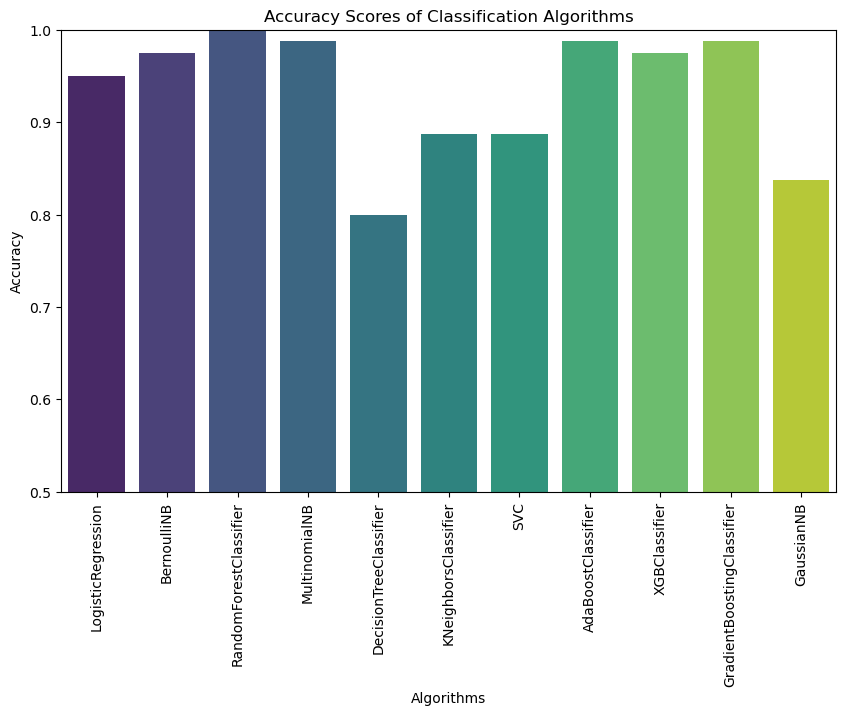

In [367]:
random_accuracy=1.0
logistic_accuracy=.975
decision_accuracy=.9875
knn_accuracy=.8
svm_accuracy=.8875
ada_accuracy=.8875
xgb_accuracy=.9875
gb_accuracy=.975
gnb_accuracy=.9875
mnb_accuracy=.8375
bnb_accuracy=.95
plt.figure(figsize=(10, 6))
sns.barplot(x=['LogisticRegression','BernoulliNB','RandomForestClassifier','MultinomialNB','DecisionTreeClassifier','KNeighborsClassifier','SVC','AdaBoostClassifier','XGBClassifier','GradientBoostingClassifier','GaussianNB'], y=[bnb_accuracy,logistic_accuracy,random_accuracy,decision_accuracy,knn_accuracy,svm_accuracy,ada_accuracy,xgb_accuracy,gb_accuracy,gnb_accuracy,mnb_accuracy], palette='viridis')
plt.title('Accuracy Scores of Classification Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=90)
plt.show()

# CONCLUSION

Random Forest is the best algorithm for this dataset based on the evaluation metrics, dataset characteristics, and insights gained,And it gives best accuracy with accuracy score 100%